In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


In [2]:
#Testing dataset
filepath = "./winequality.csv"

df = pd.read_csv(filepath)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Understanding the data

In [3]:
df.shape

(1599, 12)

In [4]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Display summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Learning more about the data through Explatory Data Analysis (EDA)

C:\Users\Darren\AppData\Local\Temp\ipykernel_11616\3649661369.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


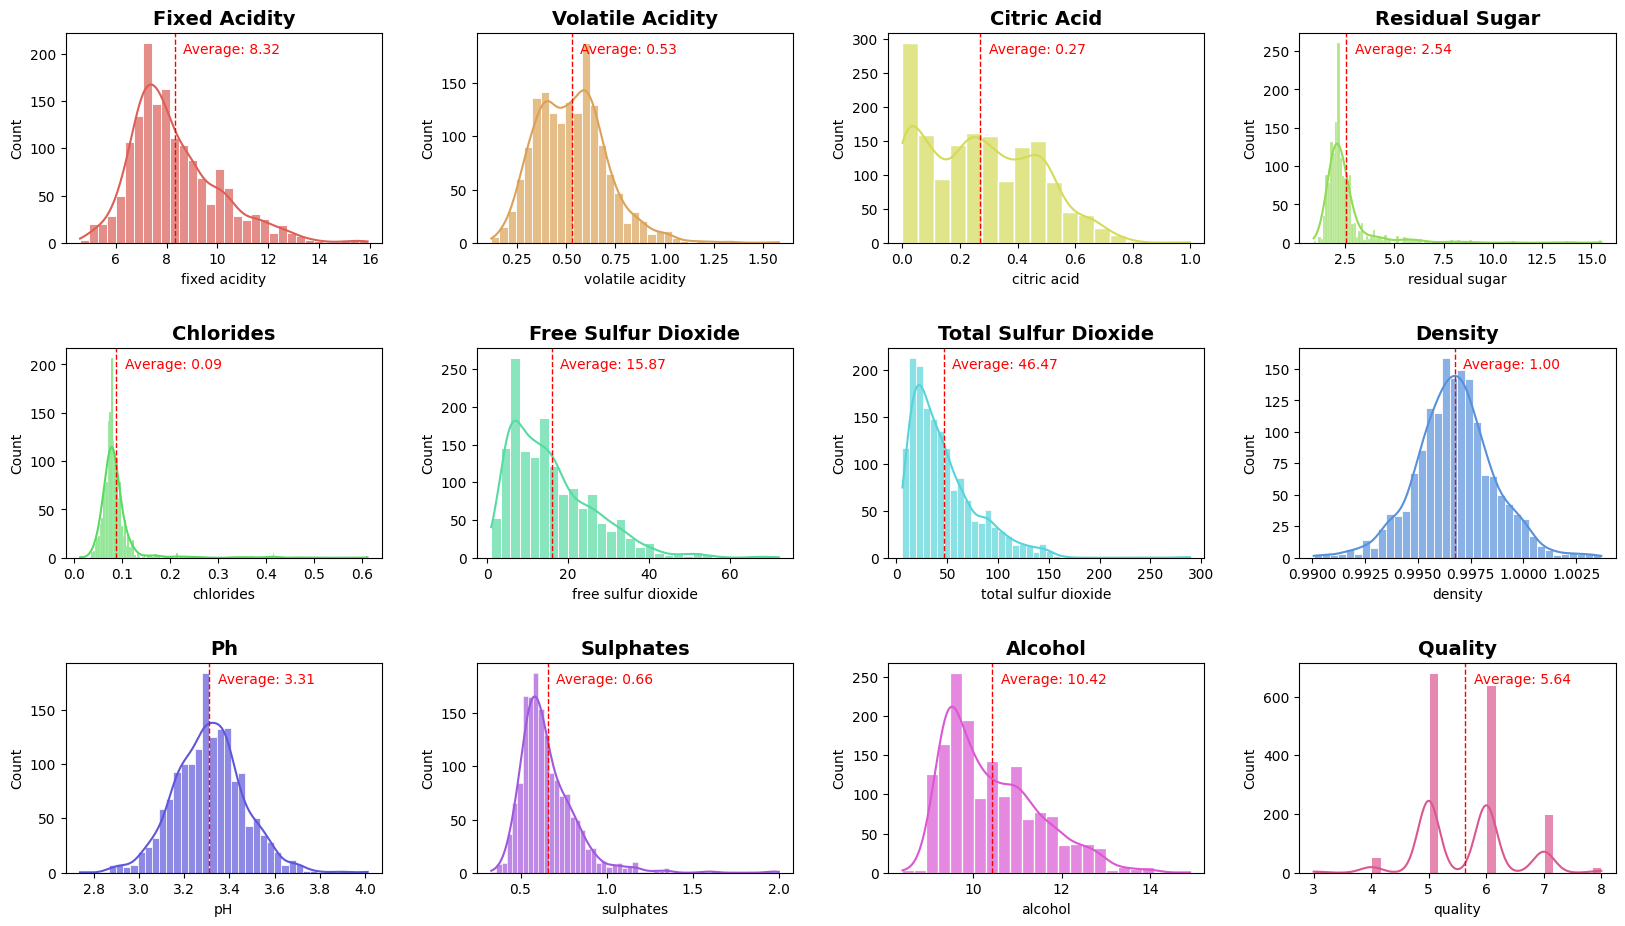

In [7]:
# Create subplots for the histograms
fig, axes = plt.subplots(len(df.columns)//4 + 1, 4, figsize=(20, 15),
                         gridspec_kw={'wspace': 0.3, 'hspace': 0.5})
axes = axes.flatten()

colors = sns.color_palette("hls", len(df.columns))

# Iterate through each feature to plot its histogram, add a mean line
for i, col in enumerate(df.columns):
    # Plot histogram
    sns.histplot(df[col], ax=axes[i], kde=True, color=colors[i], edgecolor='white', alpha=0.7)
    
    # Calculate mean
    mean_val = df[col].mean()
    axes[i].axvline(mean_val, color='r', linestyle='dashed', linewidth=1)
    
    # Annotate mean value on the plot
    min_ylim, max_ylim = axes[i].get_ylim()
    axes[i].text(mean_val + (df[col].max() - df[col].min()) * 0.03, max_ylim * 0.9, f'Average: {mean_val:.2f}', color='r')  

    # Added title to the plot
    axes[i].set_title(col.title(), fontsize=14, weight='bold')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Plot histogram for all columns with an average dotted line
plt.tight_layout()
plt.show()

Correlatio Analysis of Features (input) vs Label (output)

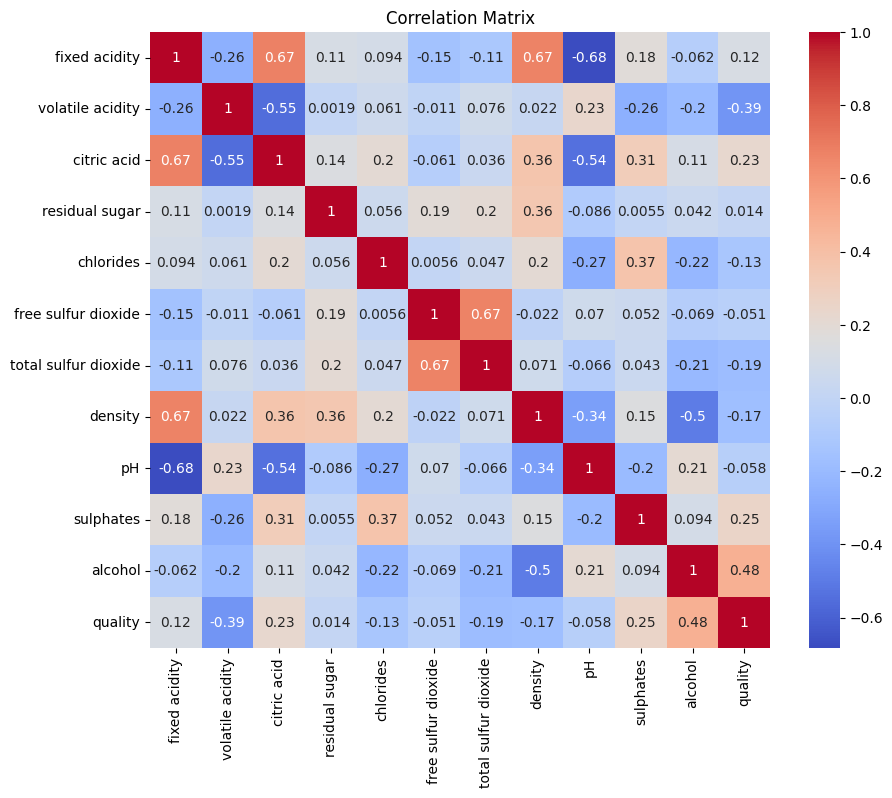

In [8]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Heatmap to show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

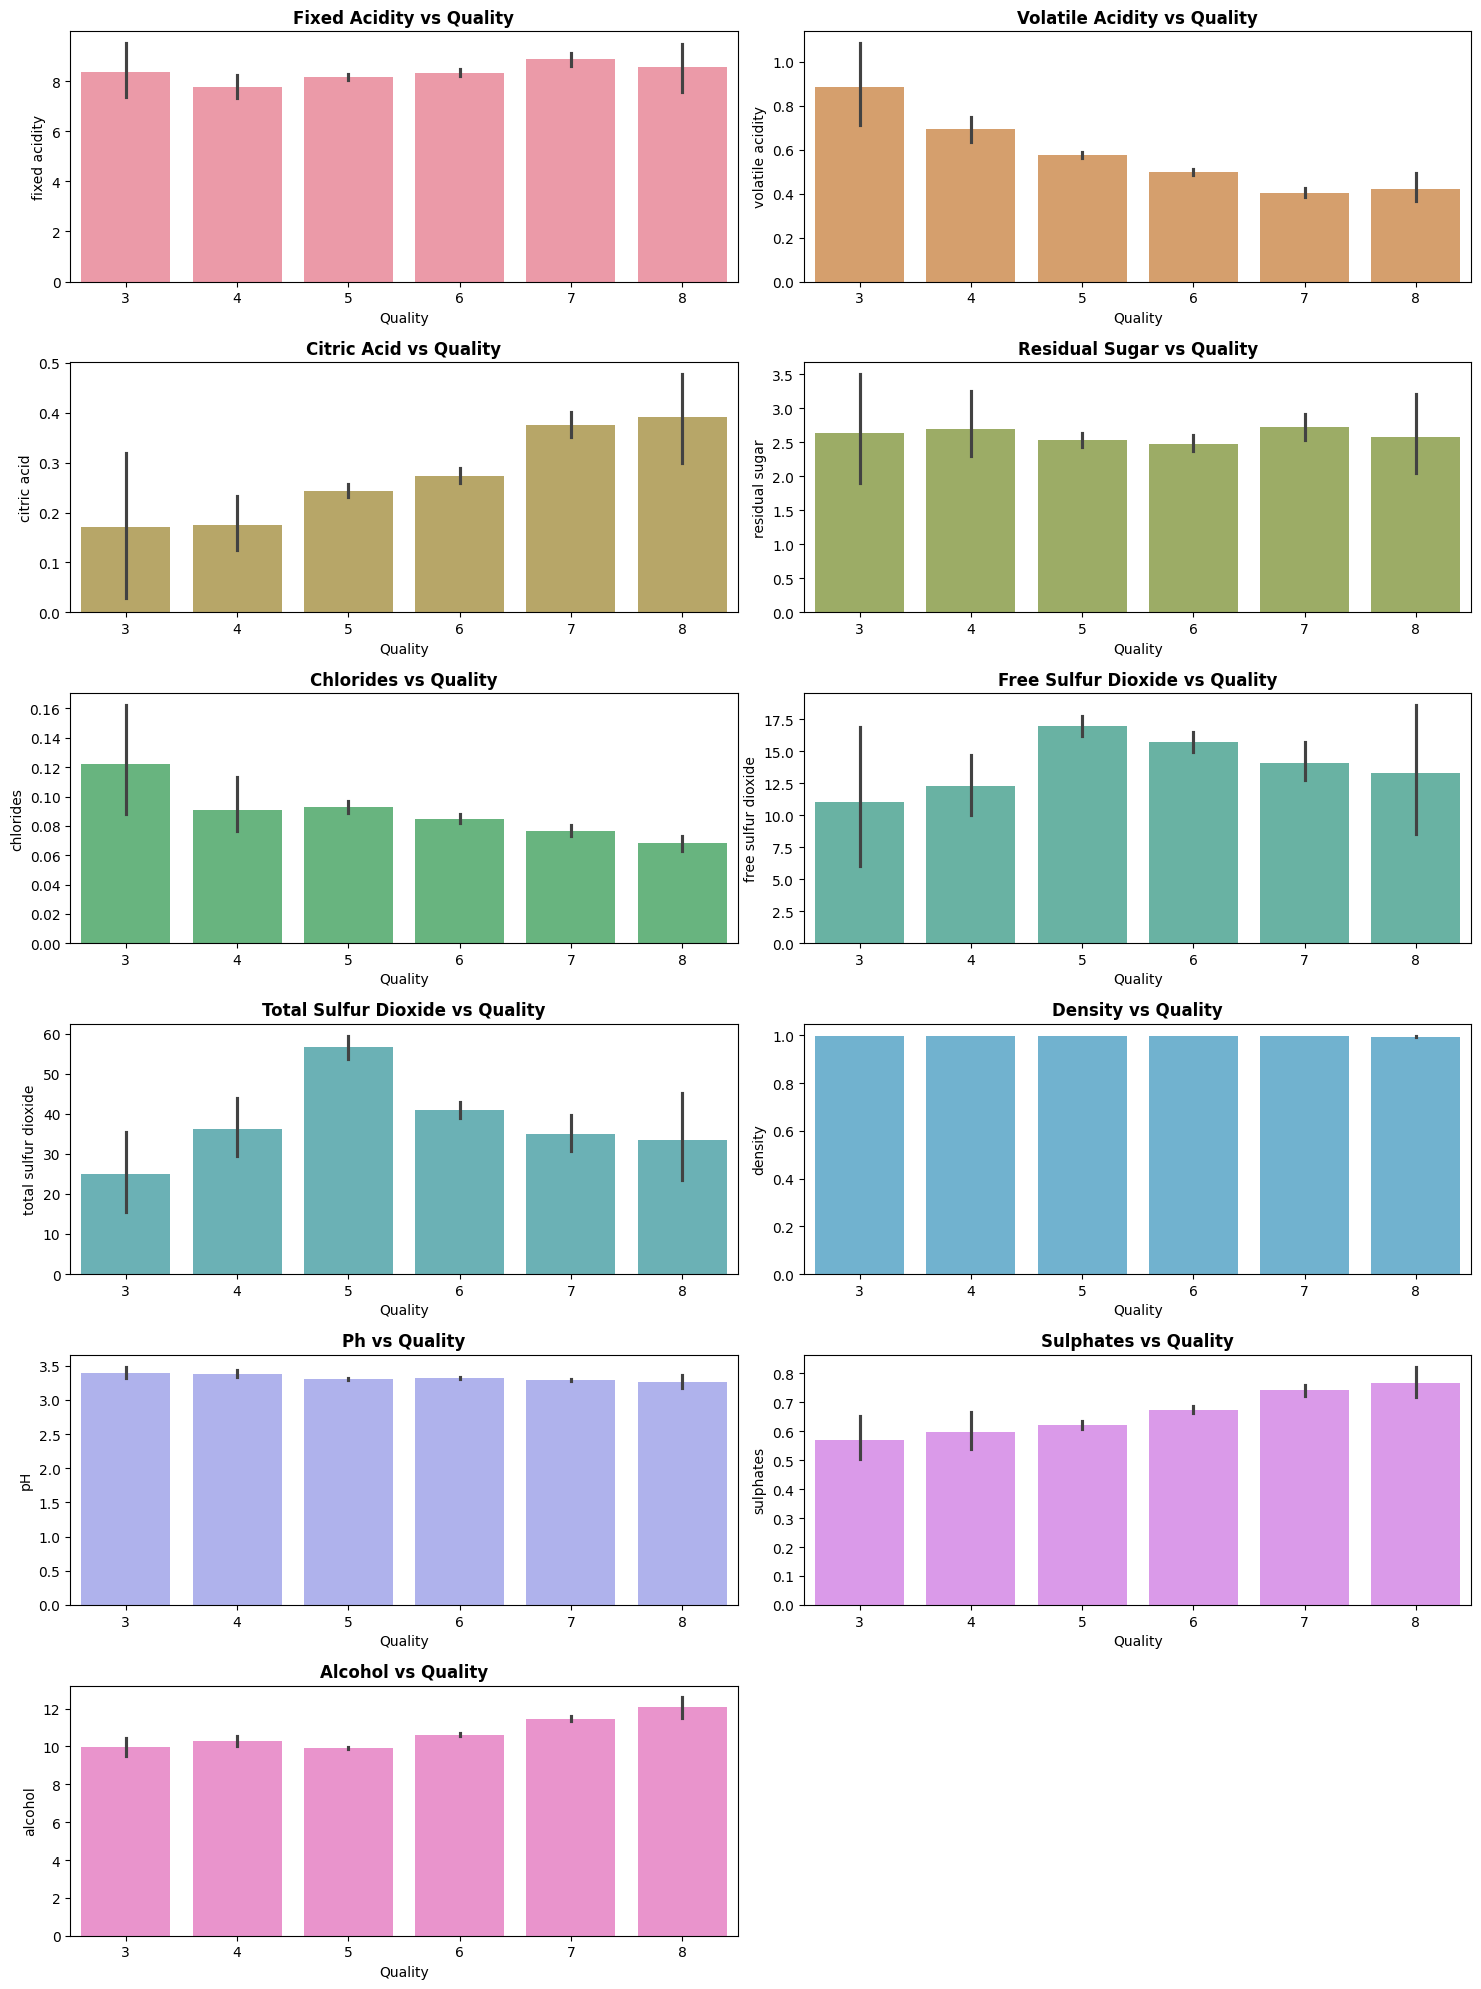

In [9]:
# Separate features and target variable
features = df.drop('quality', axis=1)
target = df['quality']

# Prepare plot parameters
num_cols = 2 
num_rows = (features.shape[1] + num_cols - 1) // num_cols 

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

# Define a color palette
colors = sns.color_palette("husl", len(features.columns))

# Loop over each feature and create bar plot with quality
for i, (feature_name, col) in enumerate(features.items()):
    sns.barplot(x=target, y=col, data=df, ax=axes[i], color=colors[i], alpha=0.8)
    axes[i].set_title(f'{feature_name.title()} vs Quality', weight='bold')
    axes[i].set_xlabel('Quality')
    axes[i].set_ylabel(feature_name)

# Remove any unused axes
for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

# Plot barplot for all features vs quality
plt.tight_layout()
plt.show()


Decison Tree Model

In [10]:
# Preparing the data
from sklearn.model_selection import train_test_split

df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Buildind and training the model
from sklearn.tree import DecisionTreeClassifier

# Create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.8719
Classification Report:
              precision    recall  f1-score   support

         Bad       0.92      0.93      0.93       273
        Good       0.57      0.51      0.54        47

    accuracy                           0.87       320
   macro avg       0.74      0.72      0.73       320
weighted avg       0.87      0.87      0.87       320

Decision Tree Confusion Matrix:
Predicted:  Bad  Good
Actual: Bad   255    18
       Good    23    24


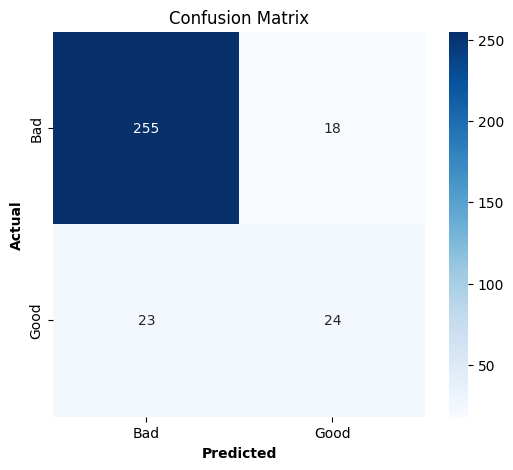

In [12]:
# Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the quality on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Bad', 'Good'])
print(f'Classification Report:\n{report}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix 
print("Decision Tree Confusion Matrix:")
print("Predicted:  Bad  Good")
print(f"Actual: Bad  {conf_matrix[0][0]:4d}  {conf_matrix[0][1]:4d}")
print(f"       Good  {conf_matrix[1][0]:4d}  {conf_matrix[1][1]:4d}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted', weight='bold')
plt.ylabel('Actual', weight='bold')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Buildind and training the model
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.9000
Random Forest Classification Report:
              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94       273
        Good       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

Random Forest Confusion Matrix:
Predicted:  Bad  Good
Actual: Bad   264     9
       Good    23    24


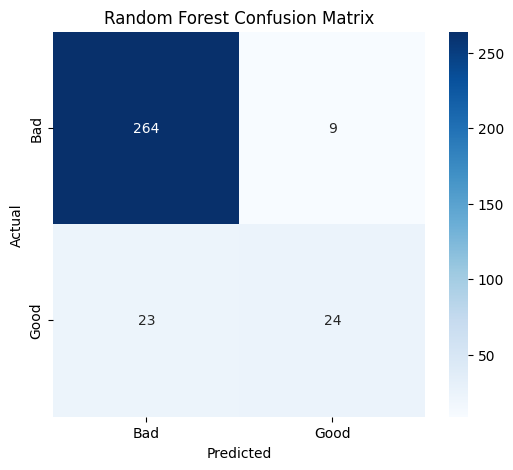

In [14]:
# Predict the quality on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Generate classification report
report_rf = classification_report(y_test, y_pred_rf, target_names=['Bad', 'Good'])
print(f'Random Forest Classification Report:\n{report_rf}')

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print confusion matrix 
print("Random Forest Confusion Matrix:")
print("Predicted:  Bad  Good")
print(f"Actual: Bad  {conf_matrix_rf[0][0]:4d}  {conf_matrix_rf[0][1]:4d}")
print(f"       Good  {conf_matrix_rf[1][0]:4d}  {conf_matrix_rf[1][1]:4d}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Interpretation
- Accuracy: The Random Forest model has a higher accuracy as compared to the Decision Tree model.
- Precision, Recall, and F1-Score: The Random Forest model shows improved precision, recall, and F1-score, especially for the "Good" class.

Confusion Matrix:
- The Random Forest model has fewer false positives (9) as compared to the Decision Tree model of (18).
- The Random Forest and Decision Tree model are both similar in false negatives of (23).
- The Random Forest model is slightly more accurate in true negatives (264) as compared to the Decision Tree model of (255). However, both models are the same in true postives of (24).

This indicates that the Random Forest model performs better overall compared to the Decision Tree model, particularly in identifying "Bad" wines.

K-Means Clustering

In [15]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [29]:
from sklearn.cluster import KMeans

# Apply K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Include the cluster labels in the features
X2 = df.drop(['quality', 'quality_binary'], axis=1)
y2 = df['quality_binary']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


In [41]:
from sklearn.decomposition import PCA
import plotly.express as px

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

# Create a DataFrame for the 2D PCA data
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = cluster_labels

# Convert cluster labels to string for plotting
df_pca['cluster'] = df_pca['cluster'].astype(str)

# Plotting the clusters with an interactive scatter plot using Plotly
fig = px.scatter(df_pca, x='PCA1', y='PCA2', color='cluster', 
                 color_discrete_sequence=px.colors.qualitative.Plotly,
                 title='K-means Clusters (PCA-reduced data)',
                 labels={'cluster': 'Cluster'})

# Update marker properties
fig.update_traces(marker=dict(size=10, line=dict(width=0, color=None), opacity=0.4), selector=dict(mode='markers'))

# Set fixed axis ranges so that chart doesnt adjsut accordingly to Legend
x_min, x_max = df_pca['PCA1'].min() - 1, df_pca['PCA1'].max() + 1
y_min, y_max = df_pca['PCA2'].min() - 1, df_pca['PCA2'].max() + 1

fig.update_xaxes(range=[x_min, x_max])
fig.update_yaxes(range=[y_min, y_max])

fig.update_layout(
    width=700, 
    height=500,  
    title={'x':0.5}, 
    margin=dict(l=40, r=40, t=40, b=40)  
)

# Show the plot
fig.show()

Decision Tree Model with K-means clustering

In [31]:
# Create the decision tree classifier
model2 = DecisionTreeClassifier(random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.8938
Classification Report:
              precision    recall  f1-score   support

         Bad       0.93      0.94      0.94       273
        Good       0.64      0.62      0.63        47

    accuracy                           0.89       320
   macro avg       0.79      0.78      0.78       320
weighted avg       0.89      0.89      0.89       320

Decision Tree Confusion Matrix:
Predicted:  Bad  Good
Actual: Bad   257    16
       Good    18    29


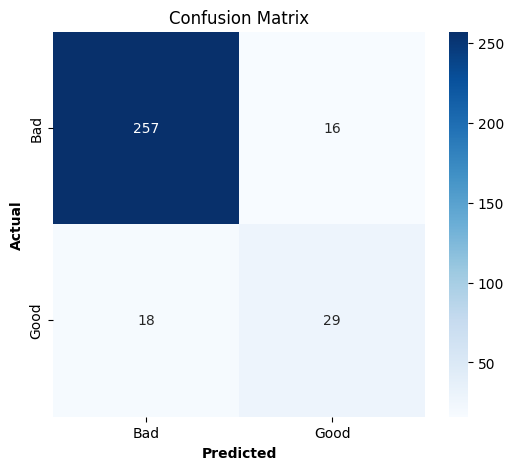

In [32]:
# Predict the quality on the test set
y_pred2 = model2.predict(X_test2)

# Calculate accuracy
accuracy = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
report = classification_report(y_test2, y_pred2, target_names=['Bad', 'Good'])
print(f'Classification Report:\n{report}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test2, y_pred2)

# Print confusion matrix 
print("Decision Tree Confusion Matrix:")
print("Predicted:  Bad  Good")
print(f"Actual: Bad  {conf_matrix[0][0]:4d}  {conf_matrix[0][1]:4d}")
print(f"       Good  {conf_matrix[1][0]:4d}  {conf_matrix[1][1]:4d}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted', weight='bold')
plt.ylabel('Actual', weight='bold')
plt.title('Confusion Matrix')
plt.show()


Random Forest Model with K-means clustering 

In [33]:
# Create the random forest classifier
rf_model2 = RandomForestClassifier(random_state=42)

# Train the model
rf_model2.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

Random Forest Accuracy: 0.9000
Random Forest Classification Report:
              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94       273
        Good       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

Random Forest Confusion Matrix:
Predicted:  Bad  Good
Actual: Bad   264     9
       Good    23    24


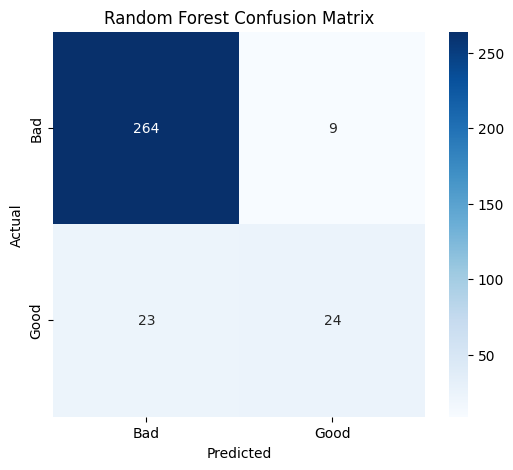

In [34]:
# Predict the quality on the test set
y_pred_rf2 = rf_model2.predict(X_test2)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test2, y_pred_rf2)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Generate classification report
report_rf = classification_report(y_test2, y_pred_rf2, target_names=['Bad', 'Good'])
print(f'Random Forest Classification Report:\n{report_rf}')

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y_test2, y_pred_rf2)

# Print confusion matrix 
print("Random Forest Confusion Matrix:")
print("Predicted:  Bad  Good")
print(f"Actual: Bad  {conf_matrix_rf[0][0]:4d}  {conf_matrix_rf[0][1]:4d}")
print(f"       Good  {conf_matrix_rf[1][0]:4d}  {conf_matrix_rf[1][1]:4d}")

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()